In [131]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [132]:
yosemite_visitors = pd.read_csv("Resources/yosemite.csv")
yosemite_visitors

,Field1,Field2,Field3,Field4,RecreationHours,NonRecreationHours,Field5,Field6,Field7,Field8,...,Textbox24,Textbox32,Field23,Field24,Field25,Field26,Field27,Field28,Textbox7,Field29
0,1979,January,"72,701","3,053","2,098,509","87,519","30,515",442,405,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
1,1979,February,"72,926","3,030","2,098,838","86,785","37,744",500,971,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
2,1979,March,"87,950","3,751","2,511,342","105,268","46,752",731,"1,010",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
3,1979,April,"136,275","5,477","3,897,346","152,005","57,796","7,446","2,758",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
4,1979,May,"210,756","7,765","5,805,477","204,231","82,611","40,206","34,947",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,"518,407","18,927","8,568,440","446,062","74,599","64,920","34,024",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
524,2022,September,"424,374","15,920","6,137,404","389,778","63,271","34,167","20,928",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
525,2022,October,"381,612","14,251","5,418,446","348,997","59,441","32,323","26,584",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
526,2022,November,"178,786","7,773","2,634,129","214,985","39,016","10,421","12,100",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"


In [133]:
new_yosemite = yosemite_visitors.rename(columns={
    "Field1": "Year",
    "Field2": "Month",
    "Field3": "Recreation Visitors", 
    "Field4": "Non-Recreation Visitors",
    "RecreationHours": "Recreation Hours",
    "NonRecreationHours": "Non-Recreation Hours", 
    "Field5": "Concession Lodging",
    "Field6": "Tent Campers",
    "Field7": "RV Campers", 
    "Field9": "Backcountry Campers",
    "TotalOvernightStays": "Total Overnight Stays"
})

In [134]:
new_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Field8,...,Textbox24,Textbox32,Field23,Field24,Field25,Field26,Field27,Field28,Textbox7,Field29
0,1979,January,"72,701","3,053","2,098,509","87,519","30,515",442,405,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
1,1979,February,"72,926","3,030","2,098,838","86,785","37,744",500,971,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
2,1979,March,"87,950","3,751","2,511,342","105,268","46,752",731,"1,010",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
3,1979,April,"136,275","5,477","3,897,346","152,005","57,796","7,446","2,758",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
4,1979,May,"210,756","7,765","5,805,477","204,231","82,611","40,206","34,947",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,"518,407","18,927","8,568,440","446,062","74,599","64,920","34,024",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
524,2022,September,"424,374","15,920","6,137,404","389,778","63,271","34,167","20,928",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
525,2022,October,"381,612","14,251","5,418,446","348,997","59,441","32,323","26,584",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
526,2022,November,"178,786","7,773","2,634,129","214,985","39,016","10,421","12,100",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"


In [135]:
clean_yosemite = new_yosemite[["Year", "Month", "Recreation Visitors", "Non-Recreation Visitors", "Recreation Hours", "Non-Recreation Hours", "Concession Lodging", "Tent Campers", "RV Campers", "Backcountry Campers", "Total Overnight Stays"]].copy()

In [136]:
clean_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Backcountry Campers,Total Overnight Stays
0,1979,January,"72,701","3,053","2,098,509","87,519","30,515",442,405,914,"32,276"
1,1979,February,"72,926","3,030","2,098,838","86,785","37,744",500,971,"1,112","40,327"
2,1979,March,"87,950","3,751","2,511,342","105,268","46,752",731,"1,010","1,549","50,042"
3,1979,April,"136,275","5,477","3,897,346","152,005","57,796","7,446","2,758","2,778","70,778"
4,1979,May,"210,756","7,765","5,805,477","204,231","82,611","40,206","34,947","11,652","169,416"
...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,"518,407","18,927","8,568,440","446,062","74,599","64,920","34,024","34,372","213,443"
524,2022,September,"424,374","15,920","6,137,404","389,778","63,271","34,167","20,928","20,432","143,412"
525,2022,October,"381,612","14,251","5,418,446","348,997","59,441","32,323","26,584","6,431","125,371"
526,2022,November,"178,786","7,773","2,634,129","214,985","39,016","10,421","12,100",375,"62,150"


In [139]:
#clean_yosemite["Date"] = clean_yosemite["Month"] + ' ' + clean_yosemite["Year"].astype(str)
clean_yosemite["Recreation Visitors"] = clean_yosemite["Recreation Visitors"].str.replace(",", "").astype(float)
clean_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Backcountry Campers,Total Overnight Stays
0,1979,January,72701.0,"3,053","2,098,509","87,519","30,515",442,405,914,"32,276"
1,1979,February,72926.0,"3,030","2,098,838","86,785","37,744",500,971,"1,112","40,327"
2,1979,March,87950.0,"3,751","2,511,342","105,268","46,752",731,"1,010","1,549","50,042"
3,1979,April,136275.0,"5,477","3,897,346","152,005","57,796","7,446","2,758","2,778","70,778"
4,1979,May,210756.0,"7,765","5,805,477","204,231","82,611","40,206","34,947","11,652","169,416"
...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,518407.0,"18,927","8,568,440","446,062","74,599","64,920","34,024","34,372","213,443"
524,2022,September,424374.0,"15,920","6,137,404","389,778","63,271","34,167","20,928","20,432","143,412"
525,2022,October,381612.0,"14,251","5,418,446","348,997","59,441","32,323","26,584","6,431","125,371"
526,2022,November,178786.0,"7,773","2,634,129","214,985","39,016","10,421","12,100",375,"62,150"


In [140]:
yose_group = clean_yosemite.groupby("Year")["Recreation Visitors"].sum().reset_index()
yose_group

,Year,Recreation Visitors
0,1979,2350782.0
1,1980,2490282.0
2,1981,2516893.0
3,1982,2415587.0
4,1983,2457464.0
5,1984,2738467.0
6,1985,2831952.0
7,1986,2876717.0
8,1987,3152275.0
9,1988,3216681.0


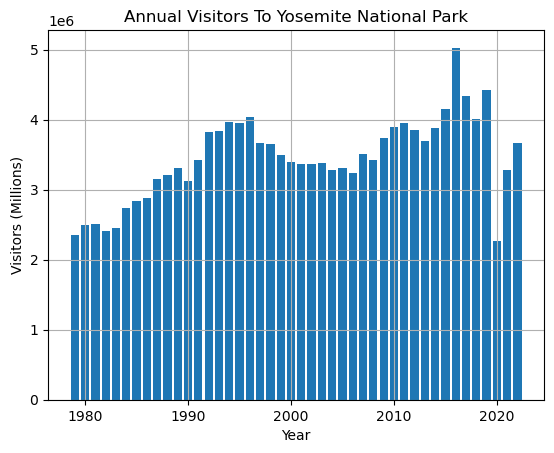

In [141]:
plt.bar(yose_group["Year"], yose_group["Recreation Visitors"])
plt.title("Annual Visitors To Yosemite National Park")
plt.xlabel("Year")
plt.ylabel("Visitors (Millions)")
plt.grid(True)
plt.savefig("output/annual_visitation.png")

In [142]:
visitors_2023 = pd.read_csv("Resources/yosevisitors.csv")
visitors_2023.dropna()

,GroupDescription,Label,ThisMonth,SameMonthLastYear,PercentChange,ThisYearYTD,LastYearYTD,PercentChangeYTD,FiscalYearYTD
0,Arch Rock,Visitors by Auto,"89,773","74,108",21.1,"725,274","653,104",11.1,"888,613"
1,Arch Rock,Visitors by Bus,"7,440","2,324",220.1,"45,825","18,965",141.6,"51,209"
2,Arch Rock,Total Recreation Visitors,"97,213","76,432",27.2,"771,099","672,069",14.7,"939,822"
3,Arch Rock,Total Non-Rec Visitors,"3,470","2,851",21.7,"28,011","25,137",11.4,"34,296"
4,Arch Rock,Number of Buses,273,105,160.0,"2,007","1,023",96.2,"2,250"
5,South Entrance,Visitors by Auto,"175,818","111,704",57.4,"1,098,260","900,478",22.0,"1,328,556"
6,South Entrance,Visitors by Bus,"7,116","5,470",30.1,"39,442","27,466",43.6,"46,619"
7,South Entrance,Total Recreation Visitors,"182,934","117,174",56.1,"1,137,702","927,944",22.6,"1,375,175"
8,South Entrance,Total Non-Rec Visitors,"9,934","6,318",57.2,"62,067","50,843",22.1,"75,063"
9,South Entrance,Number of Buses,396,295,34.2,"2,556","1,814",40.9,"2,980"


In [151]:
visitors_2023["FiscalYearYTD"] = visitors_2023["FiscalYearYTD"].str.replace(",", "").astype(float)
vis_groups_1 = visitors_2023.groupby("Label")["FiscalYearYTD"].sum().reset_index()
vis_groups_1

,Label,FiscalYearYTD
0,Number of Buses,15600.0
1,Total Non-Rec Visitors,302032.0
2,Total Recreation Visitors,7269582.0
3,Visitors by Auto,7097757.0
4,Visitors by Bus,261634.0


In [152]:
#vis_groups_1 = vis_groups_1[vis_groups_1['GroupDescription'] != 'ReportText'].reset_index(drop=True)
#vis_groups_1

In [153]:
visitors_2017 = pd.read_csv("Resources/peak_yos.csv")
visitors_2017.dropna()

,GroupDescription,Label,ThisMonth,SameMonthLastYear,PercentChange,ThisYearYTD,LastYearYTD,PercentChangeYTD,FiscalYearYTD
0,Arch Rock,Visitors by Auto,"129,830","89,180",45.6,"948,358","797,086",19.0,"1,144,752"
1,Arch Rock,Visitors by Bus,"20,214","20,346",-0.6,"134,240","148,320",-9.5,"172,468"
2,Arch Rock,Total Recreation Visitors,"150,044","109,526",37.0,"1,082,598","945,406",14.5,"1,317,220"
3,Arch Rock,Total Non-Rec Visitors,"5,051","4,236",19.2,"36,841","31,881",15.6,"44,506"
4,Arch Rock,Number of Buses,689,"7,370",-90.7,"4,545","12,075",-62.4,"5,809"
5,South Entrance,Visitors by Auto,"107,173","140,483",-23.7,"977,511","1,195,427",-18.2,"1,206,684"
6,South Entrance,Visitors by Bus,"9,609","11,844",-18.9,"53,635","75,327",-28.8,"71,738"
7,South Entrance,Total Recreation Visitors,"116,782","152,327",-23.3,"1,031,146","1,270,754",-18.9,"1,278,422"
8,South Entrance,Total Non-Rec Visitors,"6,072","7,963",-23.7,"55,219","67,577",-18.3,"68,198"
9,South Entrance,Number of Buses,343,470,-27.0,"2,131","2,899",-26.5,"2,834"


In [159]:
visitors_2017["FiscalYearYTD"] = visitors_2017["FiscalYearYTD"].replace(",", "").astype(float)
vis_groups_2 = visitors_2017.groupby("Label")["FiscalYearYTD"].sum().reset_index()
vis_groups_2

,Label,FiscalYearYTD
0,Number of Buses,23332.0
1,Total Non-Rec Visitors,332549.0
2,Total Recreation Visitors,8797434.0
3,Visitors by Auto,8240206.0
4,Visitors by Bus,609264.0


In [184]:
all_park_visits = pd.read_csv("Resources/annual_visitation.csv")
all_park_clean = (all_park_visits.dropna()).copy()

In [186]:
all_park_clean["TRV"] = all_park_clean["TRV"].str.replace(",", "")
# average_visits = all_park_visits.groupby("ParkName")["TRV"].mean()
# average_visits
#box and whisker this

,RegionName,ParkName,ParkType,Year,TRV
0,Alaska Region,Denali NP & PRES,National Park,2022,427562
1,Alaska Region,Denali NP & PRES,National Park,2021,229521
2,Alaska Region,Denali NP & PRES,National Park,2020,54850
3,Alaska Region,Denali NP & PRES,National Park,2019,601152
4,Alaska Region,Denali NP & PRES,National Park,2018,594660
...,...,...,...,...,...
7439,Southeast Region,Virgin Islands NP,National Park,1961,30600
7440,Southeast Region,Virgin Islands NP,National Park,1960,27200
7441,Southeast Region,Virgin Islands NP,National Park,1959,19800
7442,Southeast Region,Virgin Islands NP,National Park,1958,13900


In [187]:
park_totals = pd.read_csv("Resources/park_totals.csv")

In [188]:
pretty_park_totals = park_totals.dropna()

In [193]:
pretty_park_totals["Value"] = pretty_park_totals["Value"].str.replace(",", "")
pretty_park_totals

,ParkName,Rank,Value,PercentOfTotal
0,Blue Ridge PKWY,1,15711004,5.04%
1,Golden Gate NRA,2,15638911,5.01%
2,Great Smoky Mountains NP,3,12937633,4.15%
3,Gateway NRA,4,8728291,2.80%
4,Lincoln Memorial,5,7825397,2.51%
...,...,...,...,...
382,Frederick Douglass NHS,383,211,0.00%
383,Alagnak Wild River,384,184,0.00%
384,Aniakchak NM & PRES,385,179,0.00%
385,John F. Kennedy NHS,386,100,0.00%


In [196]:
msk = pretty_park_totals["ParkName"].str.contains("NP")

In [197]:
pretty_park_totals.loc[msk]

,ParkName,Rank,Value,PercentOfTotal
2,Great Smoky Mountains NP,3,12937633,4.15%
11,Grand Canyon NP,12,4732101,1.52%
12,Zion NP,13,4692417,1.50%
14,Rocky Mountain NP,15,4300424,1.38%
17,Acadia NP,18,3970260,1.27%
...,...,...,...,...
330,Lake Clark NP & PRES,331,18187,0.01%
335,Kobuk Valley NP,336,16925,0.01%
360,Gates of the Arctic NP & PRES,361,9457,0.00%
374,Bering Land Bridge NPRES,375,2642,0.00%
